In [2]:
TRAIN_PATH = "directory to extract/CovidDataset/Train"
VAL_PATH = "directory to extract/CovidDataset/Test"



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [4]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [6]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    'directory to extract/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)


Found 224 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [12]:
validation_generator = test_dataset.flow_from_directory(
    'directory to extract/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [16]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
6/6 [==============================] - 28s 5s/step - loss: 0.5826 - accuracy: 0.7031 - val_loss: 0.4446 - val_accuracy: 0.9333
Epoch 2/10
6/6 [==============================] - 37s 6s/step - loss: 0.4139 - accuracy: 0.8281 - val_loss: 0.2925 - val_accuracy: 0.9333
Epoch 3/10
6/6 [==============================] - 28s 5s/step - loss: 0.3044 - accuracy: 0.9010 - val_loss: 0.1970 - val_accuracy: 0.9667
Epoch 4/10
6/6 [==============================] - 26s 4s/step - loss: 0.2472 - accuracy: 0.8698 - val_loss: 0.1618 - val_accuracy: 0.9833
Epoch 5/10
6/6 [==============================] - 27s 4s/step - loss: 0.2239 - accuracy: 0.9115 - val_loss: 0.2428 - val_accuracy: 0.9833
Epoch 6/10
6/6 [==============================] - 27s 4s/step - loss: 0.1582 - accuracy: 0.9427 - val_loss: 0.0693 - val_accuracy: 0.9833
Epoch 7/10
6/6 [==============================] - 27s 5s/step - loss: 0.1641 - accuracy: 0.9375 - val_loss: 0.1426 - val_accuracy: 0.9667
Epoch 8/10
6/6 [==================

In [17]:
# Class Activation Maps
# Grad-CAM 

# Loss is very less

In [18]:
model.save("model_adv.h5")

In [19]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.09503831714391708, 0.9732142686843872]

In [21]:
model.evaluate_generator(validation_generator)

[0.0679204910993576, 0.9833333492279053]

# Test Image

In [22]:
model = load_model('model_adv.h5')

In [23]:
import os

In [24]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [25]:
y_actual = []
y_test = []

In [26]:
for i in os.listdir("directory to extract/CovidDataset/Val/Normal/"):
    img = image.load_img("directory to extract/CovidDataset/Val/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [27]:
for i in os.listdir("directory to extract/CovidDataset/Val/Covid/"):
    img = image.load_img("directory to extract/CovidDataset/Val/Covid/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [28]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_actual,y_test)

In [31]:
import seaborn as sns

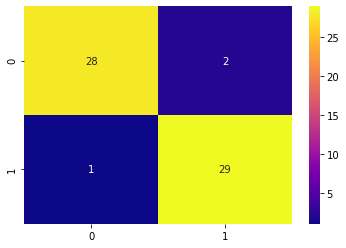

In [33]:
sns.heatmap(cm,cmap="plasma",annot=True)